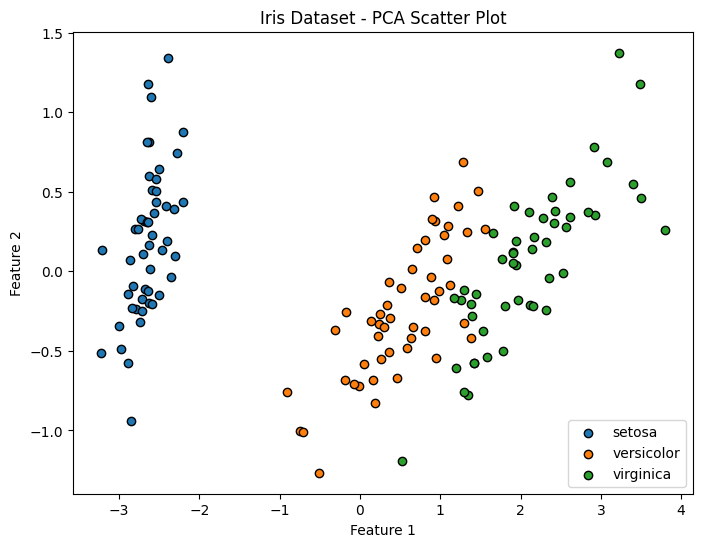

Cluster Centers (PCA space):
[[6.87120156 3.05901838 5.72070689 2.0193913 ]
 [5.01373279 3.42005383 1.46122609 0.23817622]
 [5.86617212 2.75894412 4.38575617 1.46286768]]


C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Apply PCA for feature selection (select 2 components)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Get the names of the selected features
feature_names = [f"Feature {i+1}" for i in range(2)]  # You can replace with actual feature names

# Plot the scatter graph
plt.figure(figsize=(8, 6))
for target, label in enumerate(iris.target_names):
    plt.scatter(X_reduced[y == target, 0], X_reduced[y == target, 1], label=label, edgecolor='k')

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Iris Dataset - PCA Scatter Plot')
plt.legend()
plt.show()

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_reduced)
cluster_labels = kmeans.labels_

print("Cluster Centers (PCA space):")
print(pca.inverse_transform(kmeans.cluster_centers_))  # Transform back to original feature space
